<a href="https://colab.research.google.com/github/Siddhi124github/data-science-prac-1-and-2/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#         **SHETH L.U.J & SIR M.V COLLEGE**

T096 SIDDHI NAIK
PRACTICAL 7

In [1]:
import pandas as pd

df = pd.read_csv("data.csv")
df.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


Clean Columns

In [2]:
df = df.drop(columns=[c for c in df.columns if c.startswith("Unnamed")], errors="ignore")
df = df.drop(columns=["id"], errors="ignore")
df.head()


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Encode diagnosis (M=1, B=0)

In [3]:
df['diagnosis'] = df['diagnosis'].map({'M':1, 'B':0})
df.head()


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Handle Missing Values

In [4]:
from sklearn.impute import SimpleImputer

X = df.drop(columns=['diagnosis'])
y = df['diagnosis']

imp = SimpleImputer(strategy="mean")
X = imp.fit_transform(X)


Scale the Data

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Train/Test Split

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)


Train Logistic Regression

In [7]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)


LogisticRegression(max_iter=500)

Accuracy

In [8]:
from sklearn.metrics import accuracy_score

train_acc = accuracy_score(y_train, model.predict(X_train))
test_acc = accuracy_score(y_test, model.predict(X_test))

print("Training Accuracy:", train_acc)
print("Testing Accuracy:", test_acc)


Training Accuracy: 0.9868131868131869
Testing Accuracy: 0.9649122807017544


Classification Report + Confusion Matrix

In [9]:
from sklearn.metrics import classification_report, confusion_matrix

print("Confusion Matrix:")
print(confusion_matrix(y_test, model.predict(X_test)))

print("\nClassification Report:")
print(classification_report(y_test, model.predict(X_test)))


Confusion Matrix:
[[71  1]
 [ 3 39]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        72
           1       0.97      0.93      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



Find FPR, TPR

In [10]:
from sklearn.metrics import roc_curve

y_prob = model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

print("FPR sample:", fpr[:5])
print("TPR sample:", tpr[:5])


FPR sample: [0.         0.         0.         0.01388889 0.01388889]
TPR sample: [0.         0.02380952 0.92857143 0.92857143 0.97619048]


ROC Curve

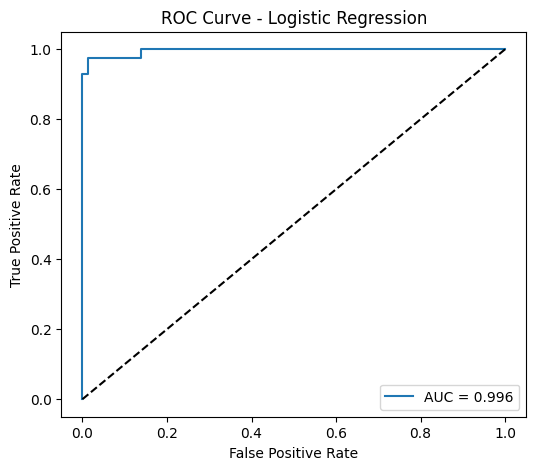

In [11]:
import matplotlib.pyplot as plt
from sklearn.metrics import auc

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label='AUC = %.3f' % auc(fpr,tpr))
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend()
plt.show()


Final Coefficients

In [12]:
import numpy as np

coeff = model.coef_[0]
for name, c in zip(df.drop(columns='diagnosis').columns, coeff):
    print(f"{name}: {c}")


radius_mean: 0.3454841471389948
texture_mean: 0.49278963675416754
perimeter_mean: 0.33878328085490095
area_mean: 0.42931319554538483
smoothness_mean: 0.3402332613377105
compactness_mean: -0.455327814329047
concavity_mean: 0.778171466809837
concave points_mean: 0.9458710238081672
symmetry_mean: -0.17627076114226278
fractal_dimension_mean: -0.07421784073537599
radius_se: 1.2078109472829
texture_se: -0.4086818387642328
perimeter_se: 0.7136454709207509
area_se: 0.9148377060345391
smoothness_se: 0.25156106824095137
compactness_se: -0.9063132768733447
concavity_se: -0.10707961585293363
concave points_se: 0.4755708384411966
symmetry_se: -0.34078306047843326
fractal_dimension_se: -0.5911008636521516
radius_worst: 0.8797424990780188
texture_worst: 1.442609466053504
perimeter_worst: 0.707924726007328
area_worst: 0.8948273268082884
smoothness_worst: 0.42283349335946624
compactness_worst: -0.18273050617038716
concavity_worst: 0.9088018959278498
concave points_worst: 0.7007552049228718
symmetry_wor